### Computational Guided Inquiry for PChem (Neshyba, 2022)

## Phase Equilibria

### Introduction

Here we're concerned with equilibria between different phases, especially as indicated in a temperature-pressure space. The *Thomson equation* is relevant to equilibria between two condensed phases of a substance. If the condensed phases are liquid and solid (the usual situation), we would write
 
$$
P = P_3 + {\Delta H_{fus} \over \Delta V_{fus}} ln \big ( {T \over T_3} \big ) \ \ \ (1)
$$

Here, $T_3$ and $P_3$ refer to the *triple-point* of the substance -- the only combination of temperature and pressure at which solid, liquid, and vapor can be simultaneously in equilibrium. We should emphasize that this is actually just a reference point for Eq. (1): any point on the solid/liquid equilibrium line would do! But it happens that the triple point is usually known to high accuracy, and published, so it's convenient for us to use here. 

To use the Thomson Equation, one needs to know $\Delta H_{fus}$ and $\Delta V_{fus}$. The former can be found in lots of thermodynamic tables. As for the latter, you might have to hunt a bit (NIST provides this kind of data). For the present purposes, you need to know that a mole of ice takes up about 10% more volume than a mole of liquid water. 

A second equation relevant to phase equilibria is the *Clausius-Clapeyron equation*, which is relevant when the phases we're talking about are a substance's condensed phase and its *vapor* phase. If the condensed phase is a *liquid*, we would write

$$
P = P_3 \times exp \big (  -{\Delta H_{vap} \over nR} \times ({1 \over T} - {1 \over T_3}) \big ) \ \ \ (2)
$$

If the equilibrium we're considering is between a *solid* and its vapor, we still use Eq. (2), but in place of $\Delta H_{vap}$ we would substitute $\Delta H_{sub}$. 

### Some practical notes

For the purposes of drawing a phase diagram, the Thomson and Clausius-Clapeyron equations as laid out above are pretty good, but there are some practical points we should emphasize. 

1. *Real* phase diagrams are obtained from measurements; these equations are just approximations. For example, both equations assume the enthalpy of the transition is constant over the range of temperatures considered. 

2. One has to be careful about the range of temperatures one lays out in using these equations: 
- For *liquid/vapor* equilibria, the relevant range of temperatures for which one would use the Clausius-Clapeyron equation lies between the triple point temperature, up to the critical temperature. Why? Below the triple-point temperature, one would be dealing with *supercooling*, which is a non-equilibrium phenomenon. And above the critical temperature, there is no distinction between liquid and gas. The Clausius-Clapeyron equation doesn't know anything about this upper limit, by the way; therefore, to generate a realistic-looking liquid/vapor curve, you would have to look up the critical temperature.
- For *solid/vapor* equilibria, the relevant *upper* limit of temperatures is the triple point temperature; above that temperature, one would be dealing with a non-equilibrium phenomenon called  *superheating*. As for a lower temperature limit, in practice one typically goes for 5-10 degrees below the triple point temperature.
- For *solid/liquid equilibria*, most substances have a *forward-sloping* curve, which means the relevant range of temperatures lies *above* the triple point temperature. However, water is different: in that case, the relevant range of temperatures lies *below* the triple-point temperature.

3. Sometimes, people like to look at the temperature scale of a phase diagram in a log space. We can do that in Python pretty easily, by substituting "plt.semilogy" for "plt.plot".

### Learning goals
1. I can use the Thomson and Clausius-Clapeyron equations to draw realistic-looking phase diagrams.
1. I can explain why the triple point temperature figures into these formulas.
1. I have a sense of the physical constraints governing the temperature ranges in such curves. 
1. I can generate semi-log plots in Python.

In [1]:
# Import resources 
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

In [3]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J/mol/K'); print(R)

# Triple point of water
T3 = AssignQuantity(273.16,'K'); print(T3)
P3 = AssignQuantity(612,'Pa'); print(P3)

# Molar mass of water
M = AssignQuantity(18,'g/mol')

8.314 joule / kelvin / mole
273.16 kelvin
612 pascal


### Define the Thomson function
The cell below defines a function that, when given a temperature range, the triple point, and the changes in enthalpy and volume that result from melting a substance, produces arrays of temperature and pressure along a liquid/solid phase boundary.

In [4]:
def Thomson(T,T3,P3,DH,DV):
    T_array = np.linspace(T3,T)
    DH_over_DV = DH/DV
    DH_over_DV.ito('pascal')
    P_array = P3 + DH_over_DV*np.log(T_array/T3)
    return T_array, P_array

### Solid -> liquid phase boundary using Thomson

Molar volume of liquid: 18 centimeter ** 3 / mole
Molar volume of solid in SI units: 19.8 centimeter ** 3 / mole
Molar volume difference: -1.8000000000000007 centimeter ** 3 / mole


<IPython.core.display.Javascript object>


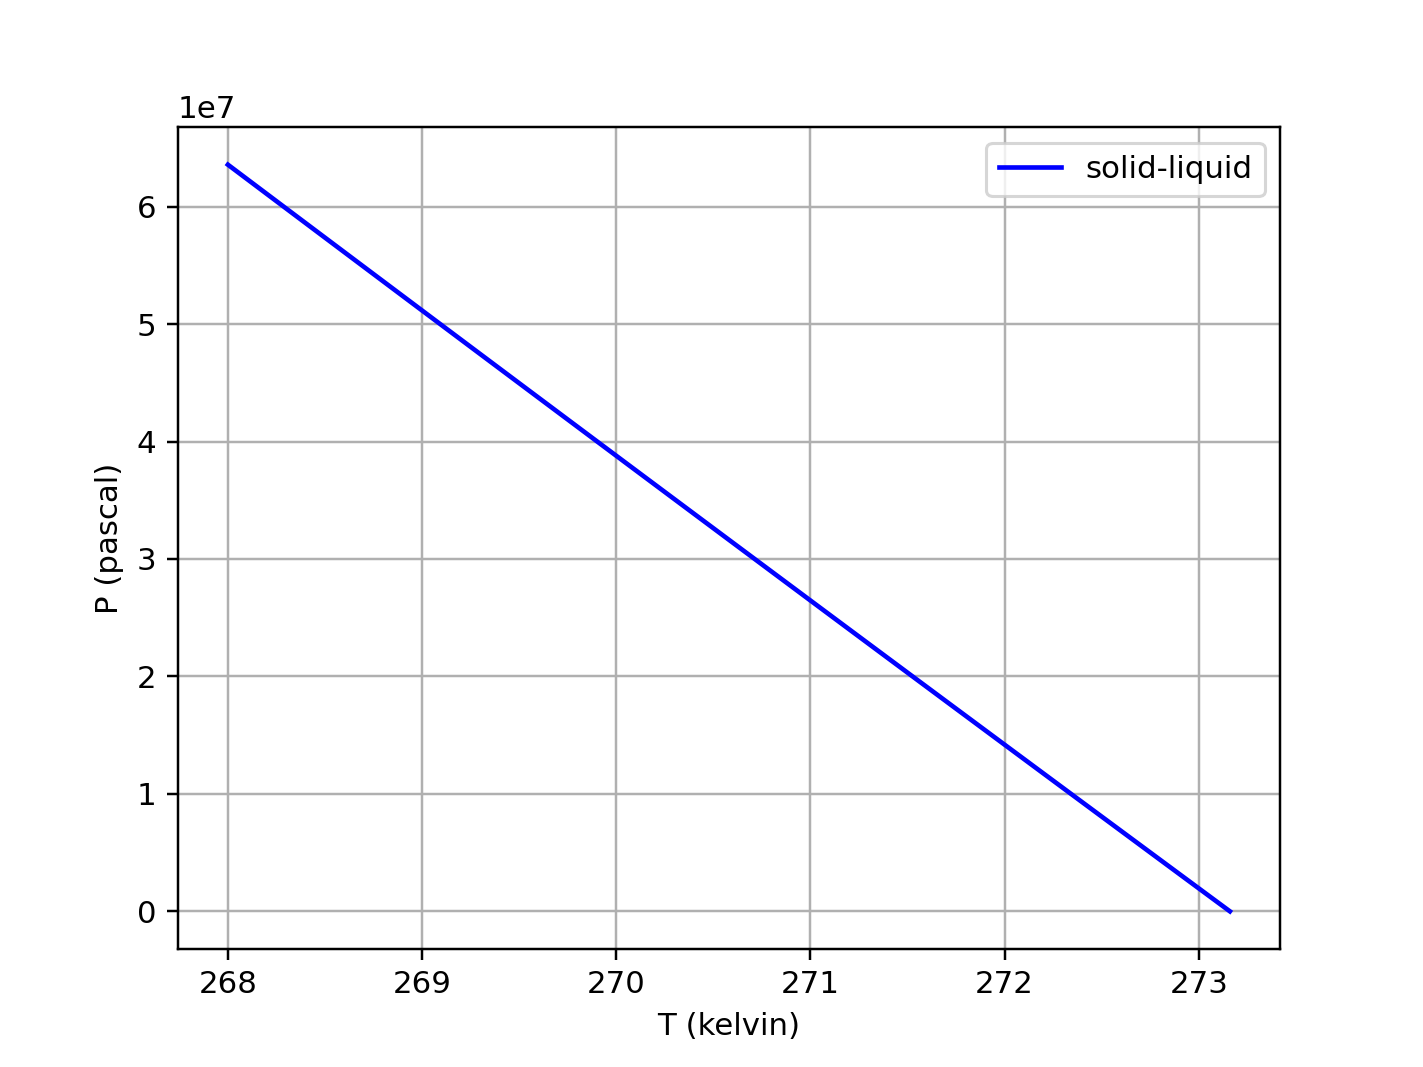

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [5]:
# Specify the temperature we want to integrate to, in units K
T = AssignQuantity(268,'K')

# Specify the enthalpy of fusion (we'll just assume the standard value at 298 K, 6 kJ/mol)
### BEGIN SOLUTION
DHfus = AssignQuantity(6,'kJ/mol')
### END SOLUTION

# Specify the volume of liquid water, 1 cm^3/g
V_liq_pergram = AssignQuantity(1,'cm^3/g') # 1 gram water has a volume of 1 cm^3

# Convert V_liq_pergram to cm^3/mol by multiplying by the molar mass of water; call the result V_liq
### BEGIN SOLUTION
V_liq = V_liq_pergram*M; print('Molar volume of liquid:', V_liq)
### END SOLUTION

# Estimate the volume of ice as 10% more than that of liquid
V_sol = V_liq*1.1; print('Molar volume of solid in SI units:', V_sol)

# Get the change in volume liq-sol; call the result DVfus
### BEGIN SOLUTION
DVfus = V_liq-V_sol; print('Molar volume difference:', DVfus)
### END SOLUTION

# Call Thomson
# T_sl, P_sl = Thomson(T,T3,P3,DHfus,DVfus,R,AssignQuantity)
T_sl, P_sl = Thomson(T,T3,P3,DHfus,DVfus)

# Plot the solid->liquid phase boundary
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.grid(True)
plt.xlabel('T ('+str(T_sl.units)+')')
plt.ylabel('P ('+str(P_sl.units)+')')
plt.legend()

### Define the Clausius-Clapeyron function
In the cell below, your task is to compute arrays of temperatures and pressures along a liquid-vapor or solid-vapor phase boundary (it's the same forumula for both). 

Because it's only the ratio of $\Delta H$ to $R$ that matters here, that's what we're passing into the function.

In [6]:
def Clausius_Clapeyron(T,T3,P3,DH_over_R):
    
### BEGIN SOLUTION
    T_array = np.linspace(T3,T)
    DH_over_R.ito('K')
    P_array = P3*np.exp(-DH_over_R*(1/T_array-1/T3))
    print('Units of resulting temperature:', T_array.units)
    print('Units of resulting pressure:', P_array.units)
### END SOLUTION

    return T_array, P_array

### Liquid -> vapor phase boundary using Clausius-Clapeyron

Units of resulting temperature: kelvin
Units of resulting pressure: pascal


<IPython.core.display.Javascript object>


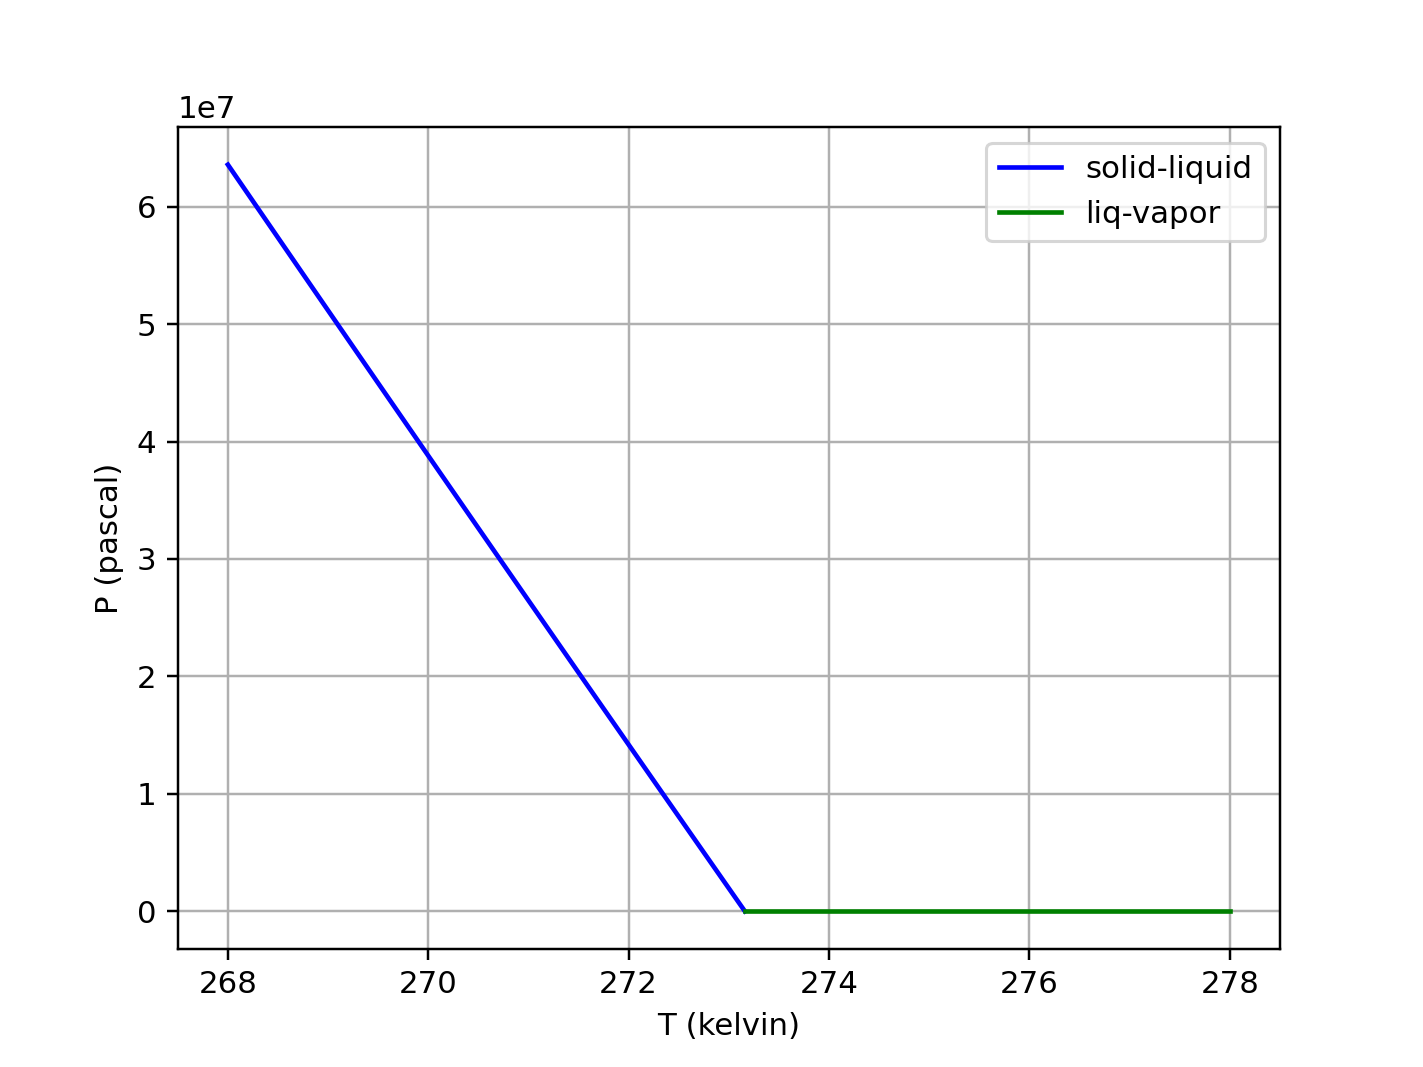

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [7]:
# Specify the temperature we want to integrate to
T = AssignQuantity(278,'K')

# Get the enthalpy of vaporization (liq->vapor) (we'll just assume the standard value at 298 K)
DHvap = AssignQuantity(44,'kJ/mol')

# Call Clausius_Clapeyron
T_lv, P_lv = Clausius_Clapeyron(T,T3,P3,DHvap/R)

# Plot the liquid->vapor phase boundary along with the solid->liquid one
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_lv.units)+')')
plt.ylabel('P ('+str(P_lv.units)+')')
plt.legend()

### Solid -> vapor phase boundary using Clausius-Clapeyron

Units of resulting temperature: kelvin
Units of resulting pressure: pascal


<IPython.core.display.Javascript object>


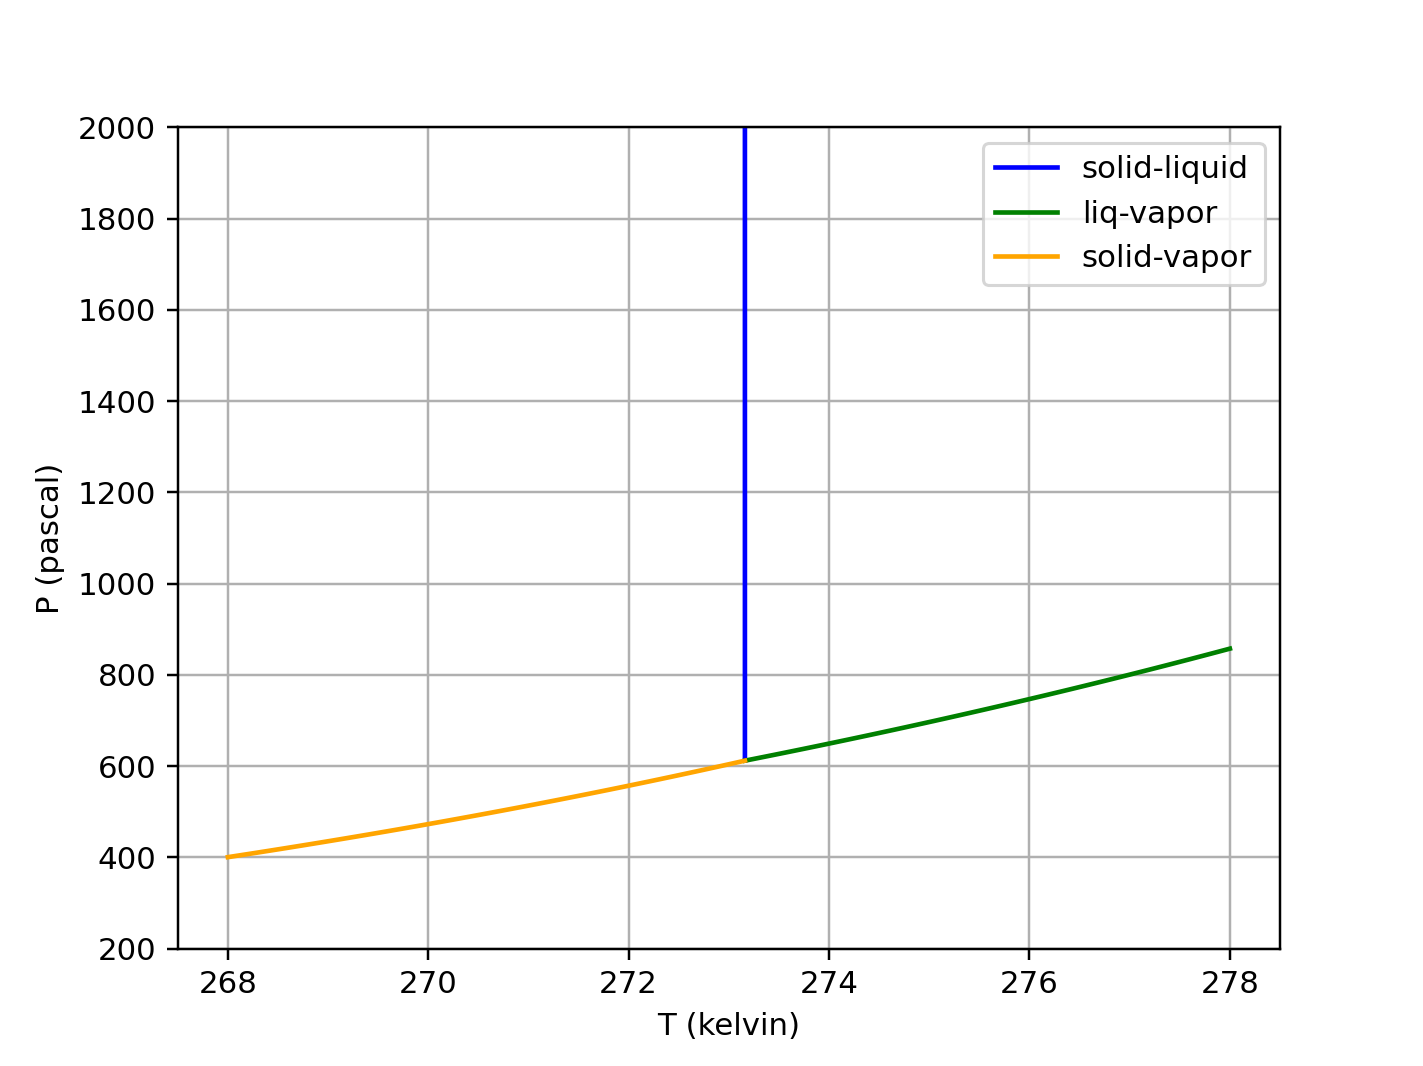

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


(200.0, 2000.0)

In [8]:
### BEGIN SOLUTION

# Specify the temperature we want to integrate to
T = AssignQuantity(268,'K')

# Get the enthalpy of sublimation (we'll just assume the standard value at 298 K)
DHsub = AssignQuantity(50,'kJ/mol')

# Call Clausius_Clapeyron
T_sv, P_sv = Clausius_Clapeyron(T,T3,P3,DHsub/R)

# Plot the solid-vapor phase boundary along with the liquid-vapor phase boundary
plt.figure()
plt.plot(T_sl,P_sl,color='blue',label='solid-liquid')
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()

### END SOLUTION

# This rescales the vertical axis so we can see more of the liquid->vapor and solid->vapor curves
plt.ylim(200,2000)

### Re-plotting on a semilog (in pressure) scale
Copy the plotting commands in your previous cell, but replace every instance of "plt.plot" with "plt.semilogy".

<IPython.core.display.Javascript object>


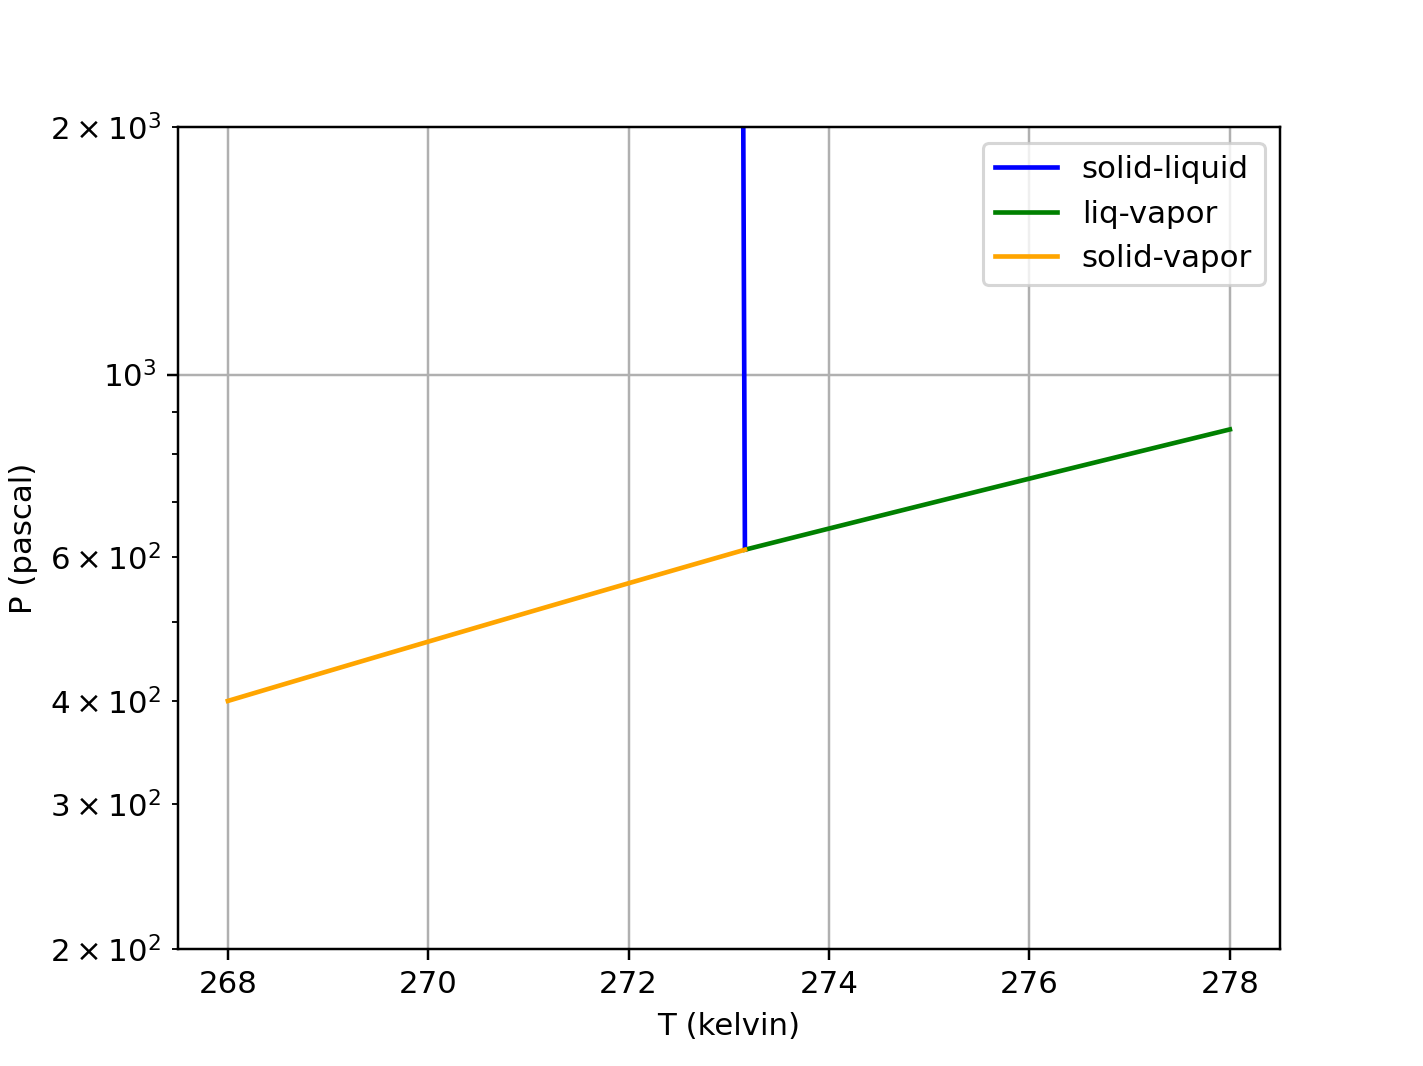

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


(200, 2000)

In [9]:
### BEGIN SOLUTION

# Plot the solid-vapor phase boundary along with the liquid-vapor phase boundary
plt.figure()
plt.semilogy(T_sl,P_sl,color='blue',label='solid-liquid')
plt.semilogy(T_lv,P_lv,color='green',label='liq-vapor')
plt.semilogy(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()

### END SOLUTION

# This rescales the vertical axis so we can see more of the liquid->vapor and solid->vapor curves
plt.ylim(200,2000)

### Refresh/save/validate/close/submit/logout